# **M.SC DISSERTATION ANALYSIS**
### **BY**
# **MICHAEL ADEKUNLE ADELERE**
### **UB NUMBER: 20019041**

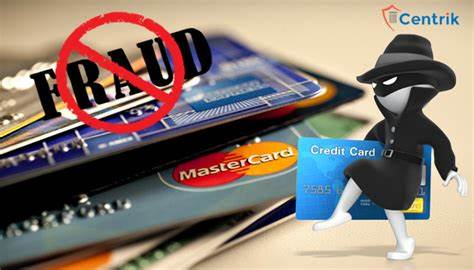

# **CREDIT CARD FRAUD DETECTION USING HYBRIDE ENSEMBLE MODELS**

## ***Limitation: This analysis runs for an average of 4 hours due to the computational power of my computer, the size of the training data, and the hyperparameters tunning set in this analysis***

## **Accessing the Data, and Modelling it for Exploratory Analysis**

In [ ]:
# Importing necessary Python modules to access the data file (csv) from the drive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Extracted file ID from the link you provided
file_id = '1Oknav4DEP490v6FytMYceCiWUGe6bhuX'

# Download the dataset
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('creditcard_Dissertation.csv')

# Load the dataset into a pandas DataFrame
credit_card = pd.read_csv('creditcard_Dissertation.csv')
print(credit_card)


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

### **Conducting EDA using Automatic Interactive EDA Library**

In [ ]:
#Installing the python  libraries for the EDA analysis
!pip install dataprep

In [ ]:
!pip install fastapi kaleido python-multipart uvicorn cohere openai tiktoken

In [ ]:
!pip install pydantic==1.8 regex==2021.11.10 dataprep

In [ ]:
!pip install --upgrade dataprep

In [ ]:
import datetime as dt
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

In [ ]:
#Showing the result of the EDA in an interactive dashbord
plot(credit_card)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Generating the statistical analysis of the dataset
report = create_report(credit_card)
report

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#understanding the target variable of the dataset
plot(credit_card, "Class")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# checking if there are any duplicate rows in the DataFrame
credit_card.duplicated().any()

True

In [ ]:
#Removing the duplicated rows
credit_card = credit_card.drop_duplicates()

In [ ]:
# checking if there are any duplicate rows in the DataFrame again
credit_card.duplicated().any()

False

In [ ]:
#Overview of the dataset after duplicate rows has been removed
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [ ]:
#Generating an external HTML report of the dataset after duplicate
!pip install sweetviz

In [ ]:
import sweetviz as sv
# Assuming credit_card is your DataFrame
cleaned_report = sv.analyze(credit_card)
cleaned_report.show_html('Credit_Card_EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Credit_Card_EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
#Creating another report to understand the changes in the dataset after duplicate has been removed
new_report = create_report(credit_card)
new_report

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#Assigning name to the class entries as fraud and normal transaction
fraud = credit_card[credit_card['Class']==1]
normal = credit_card[credit_card['Class']==0]

<ipython-input-19-6d767c95e383>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
<ipython-input-19-6d767c95e383>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


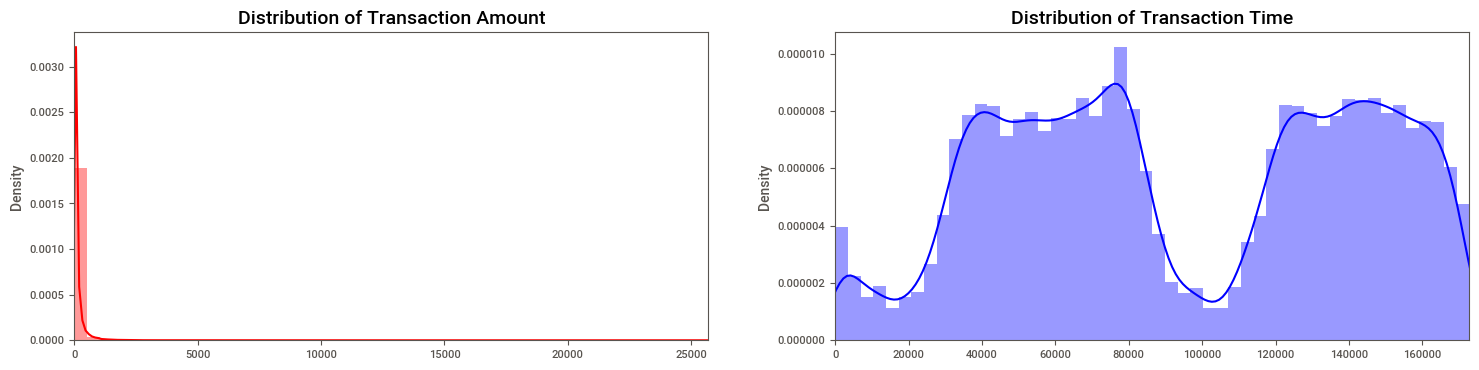

In [ ]:
#Showing the distribution of time and amount via diagram
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = credit_card['Amount'].values
time_val = credit_card['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

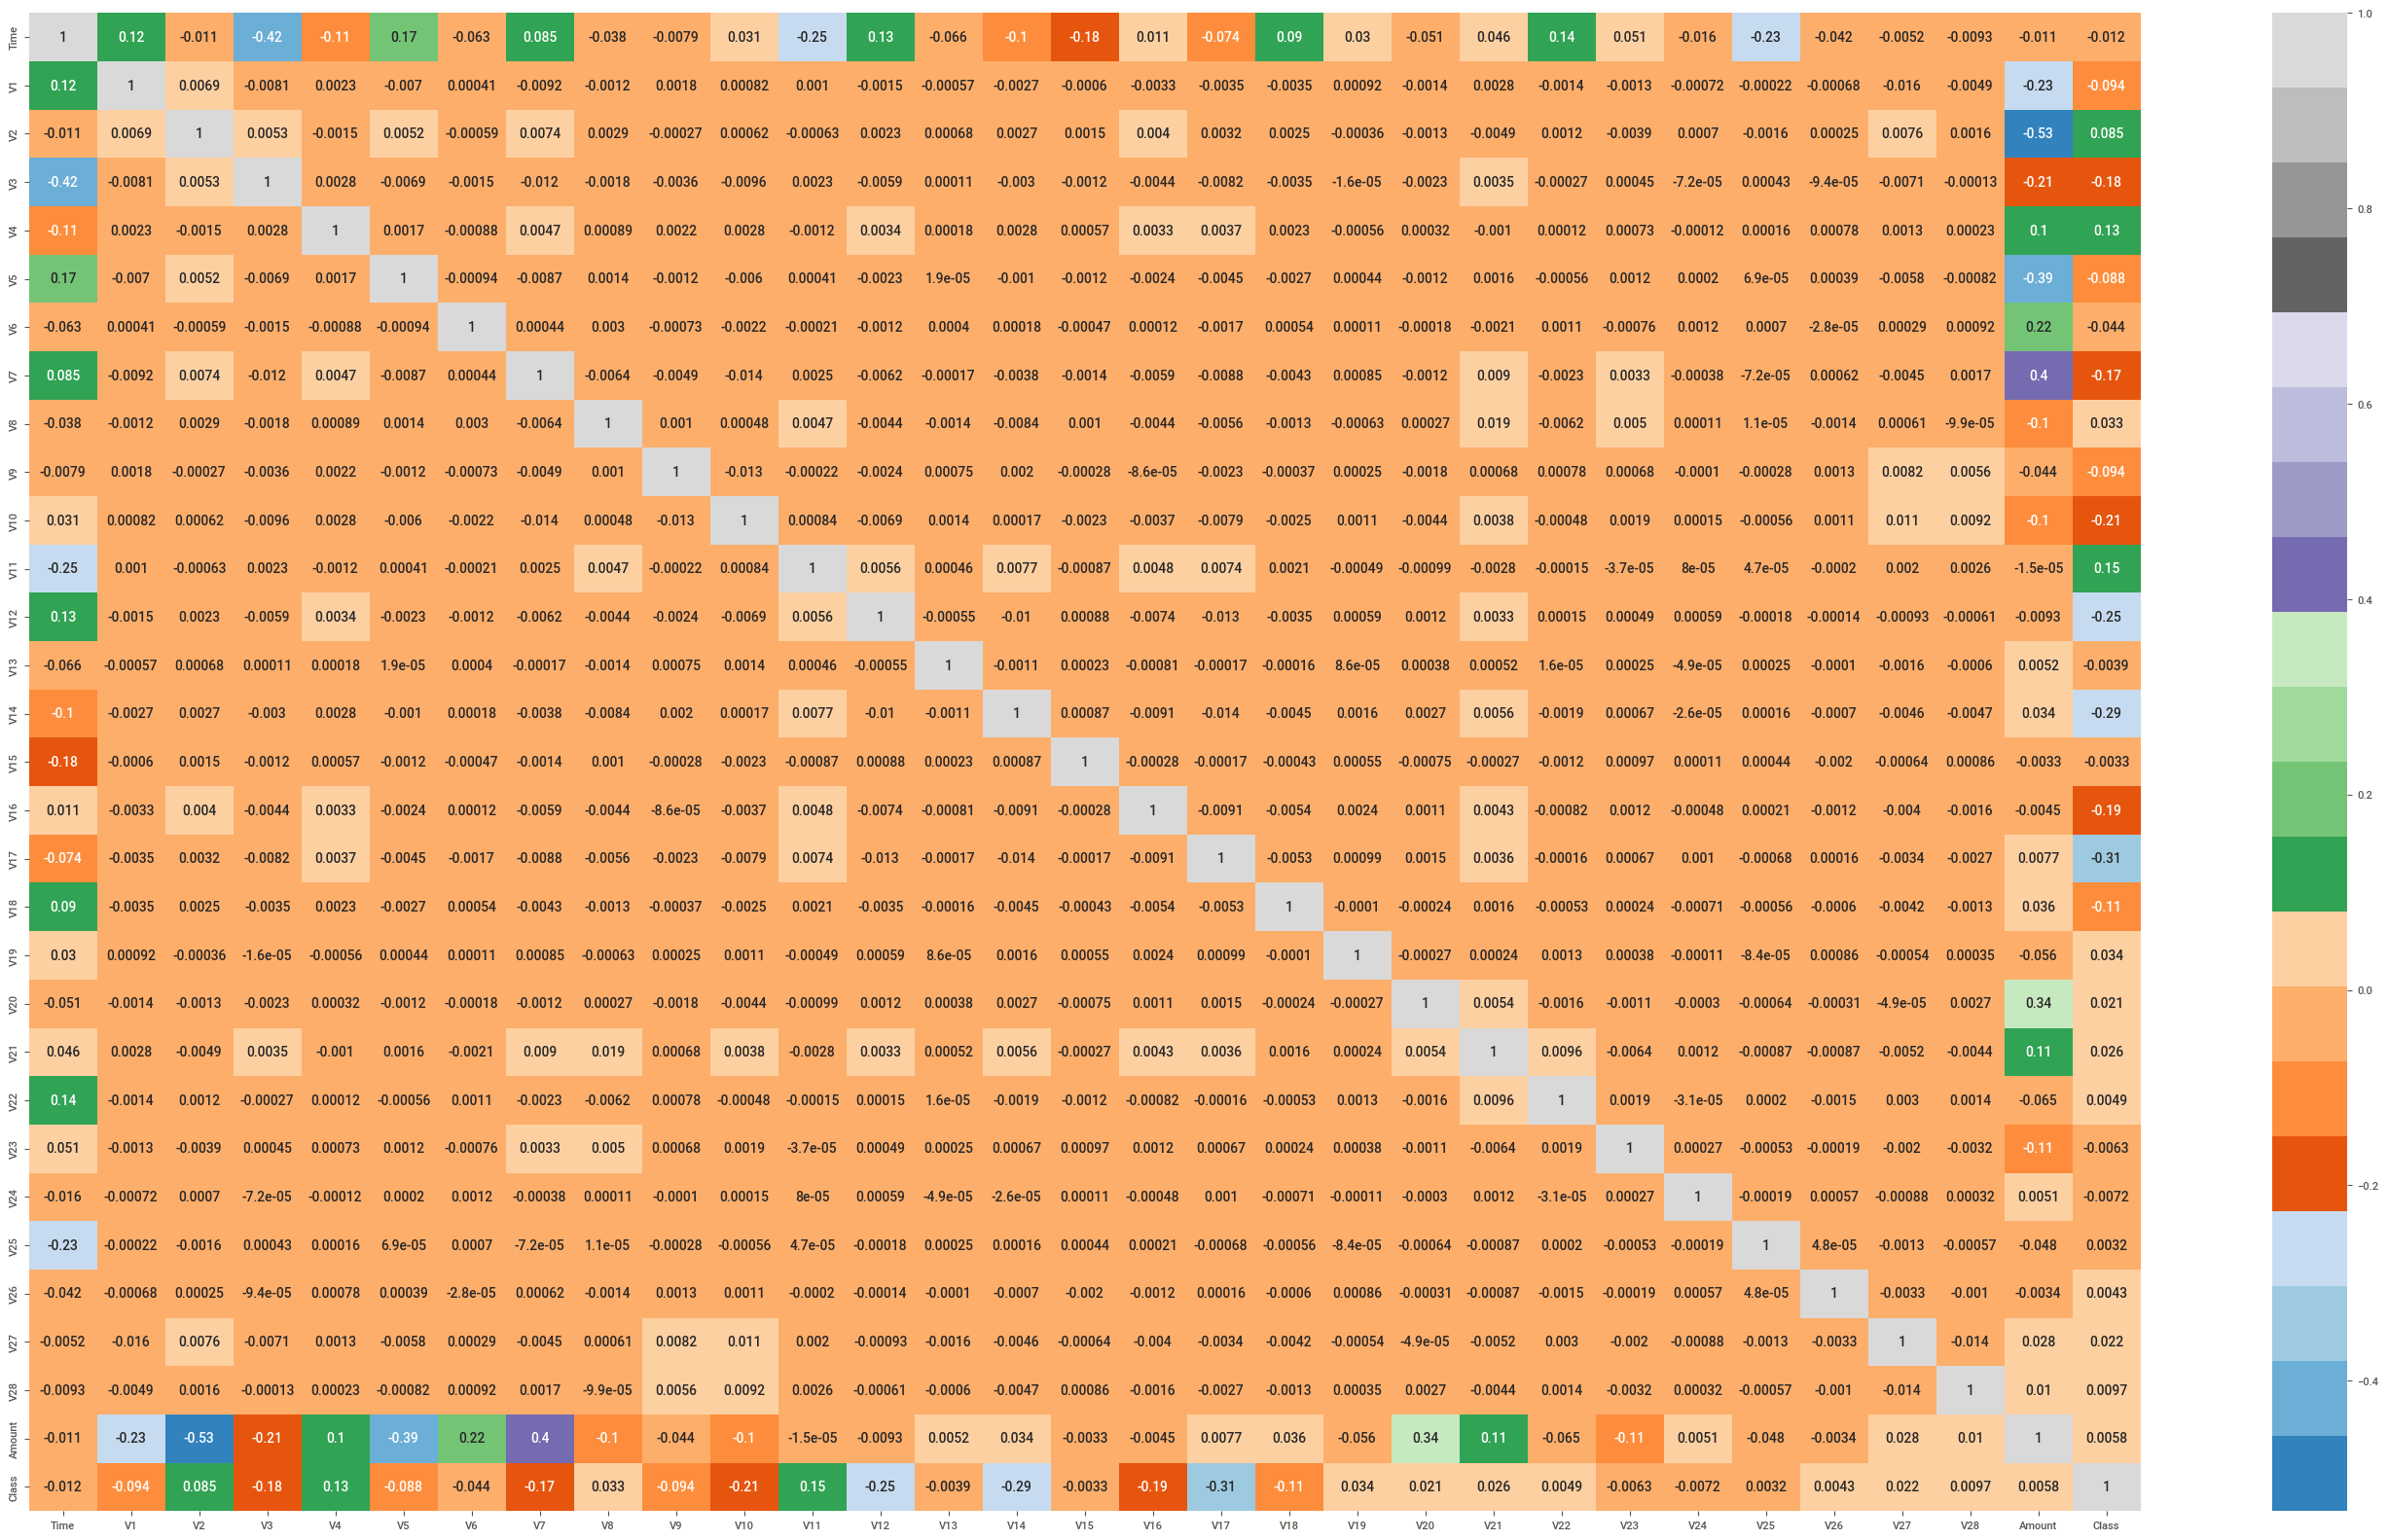

In [ ]:
#Showing the correlation among the variables using heatmap diagram
plt.figure(figsize=(35,20))
sns.heatmap(credit_card.corr(),annot=True,cmap="tab20c")
plt.show()

In [ ]:
import numpy as np
#Plotting Scatter and density plots with the correlation coefficiet to understand the relationship among the variables
def plotScatterMatrix(credit_card, plotSize, textSize):
    credit_card = credit_card.select_dtypes(include =[np.number]) # keeping only numerical columns
    # Removing rows and columns that would lead to credit_card being singular
    credit_card = credit_card.dropna('columns')
    credit_card = credit_card[[col for col in credit_card if credit_card[col].nunique() > 1]] # keeping columns where there are more than 1 unique values
    columnNames = list(credit_card)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    credit_card = credit_card[columnNames]
    ax = pd.plotting.scatter_matrix(credit_card, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = credit_card.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-21-66e153a78f2a>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  credit_card = credit_card.dropna('columns')


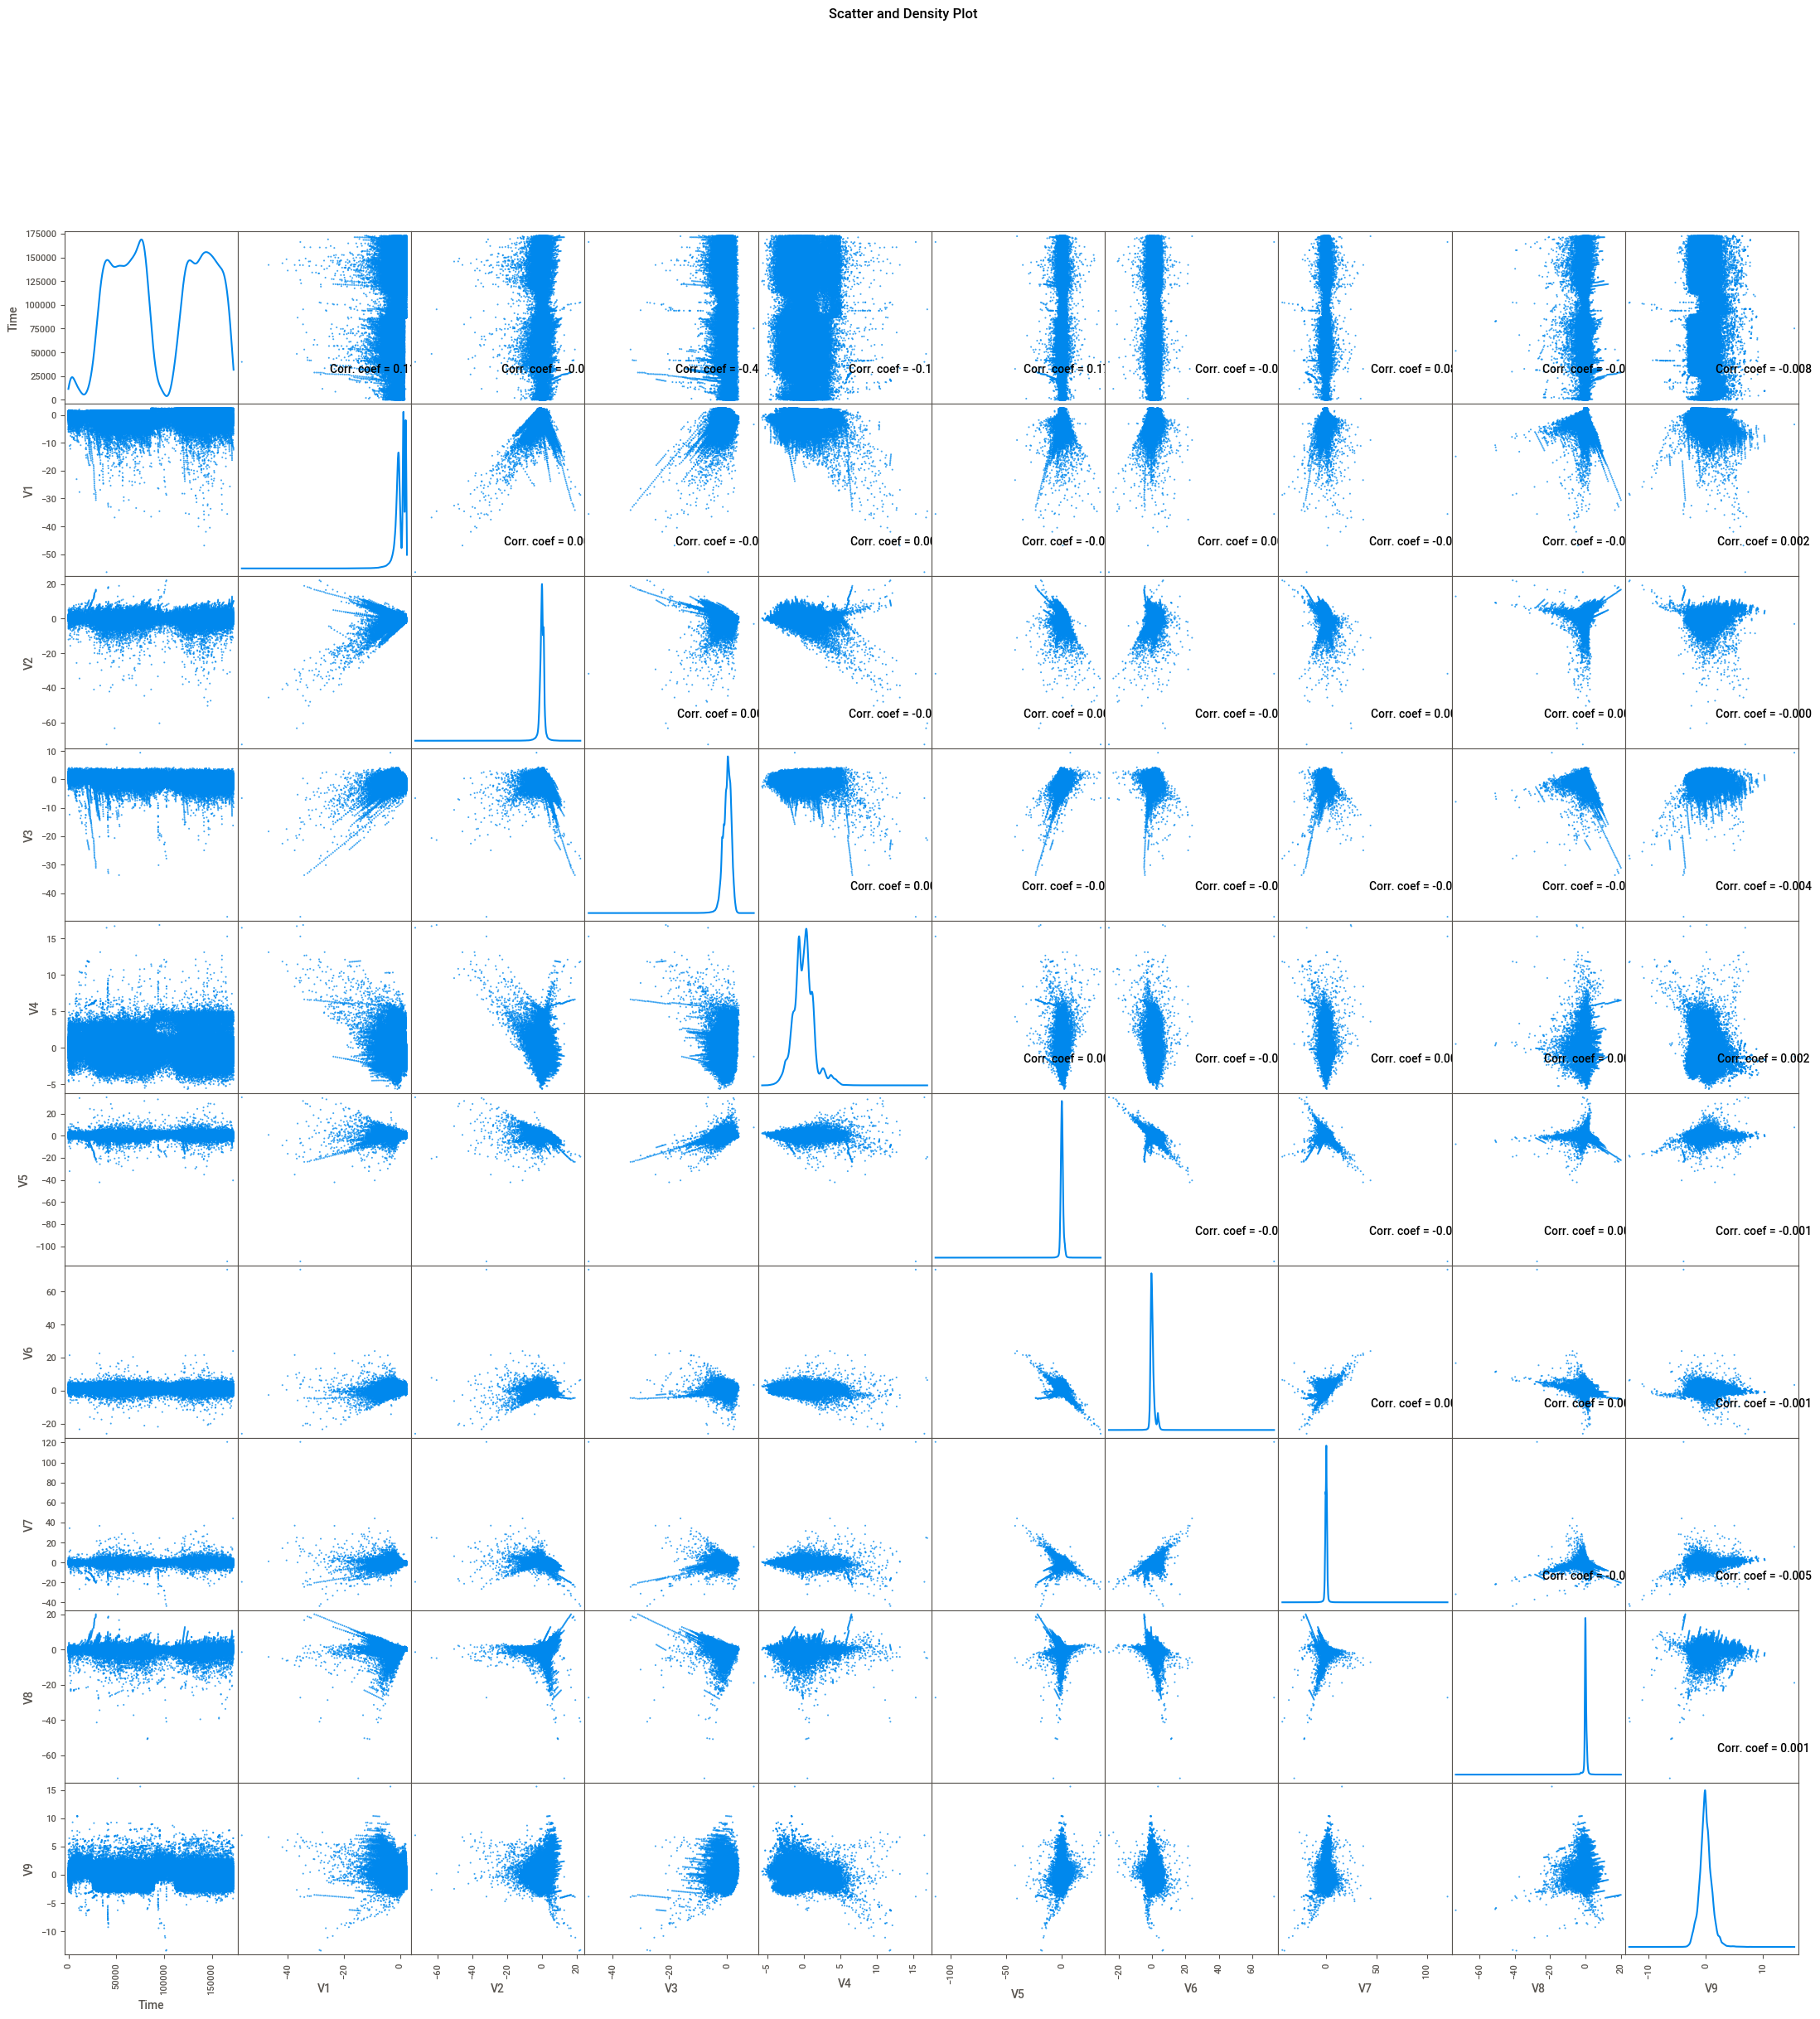

In [ ]:
plotScatterMatrix(credit_card, 27, 10)

###***Balancing the Dataset before spliting into traning and test***

In [ ]:
#Installing the library to balance the dataset
!pip install -U imbalanced-learn

In [ ]:
#Importing all the libraries for the the
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Checking the distribution of the imbalance dataset
print("Class distribution before balancing:")
print(credit_card['Class'].value_counts())

Class distribution before balancing:
0    283253
1       473
Name: Class, dtype: int64


In [ ]:
#splitting the dataset into features and target
X = credit_card.drop('Class', axis=1)
y = credit_card['Class']

In [ ]:
#Splitting the dataset into training and testing dataset using 80-20 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Using SMOTE to balance the training dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#Checking the distribution of the balance dataset
print("Class distribution after balancing:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution after balancing:
0    226597
1    226597
Name: Class, dtype: int64


In [ ]:
#Generating the report of the training balanced dataset
training_report = create_report(X_train_resampled)
training_report

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Combining features and target of the balanced data into a single DataFrame
balanced_data = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.DataFrame(y_train_resampled, columns=['Class'])], axis=1)

# Taking a random sample of 60,000 rows from the balanced data
sampled_data = balanced_data.sample(n=60000, random_state=42)

# Separating features and target from the sampled data
X_train_sampled = sampled_data.drop('Class', axis=1)
y_train_sampled = sampled_data['Class']

In [ ]:
print("sample Class distribution after balancing:")
print(pd.Series(y_train_sampled).value_counts())

sample Class distribution after balancing:
1    30144
0    29856
Name: Class, dtype: int64


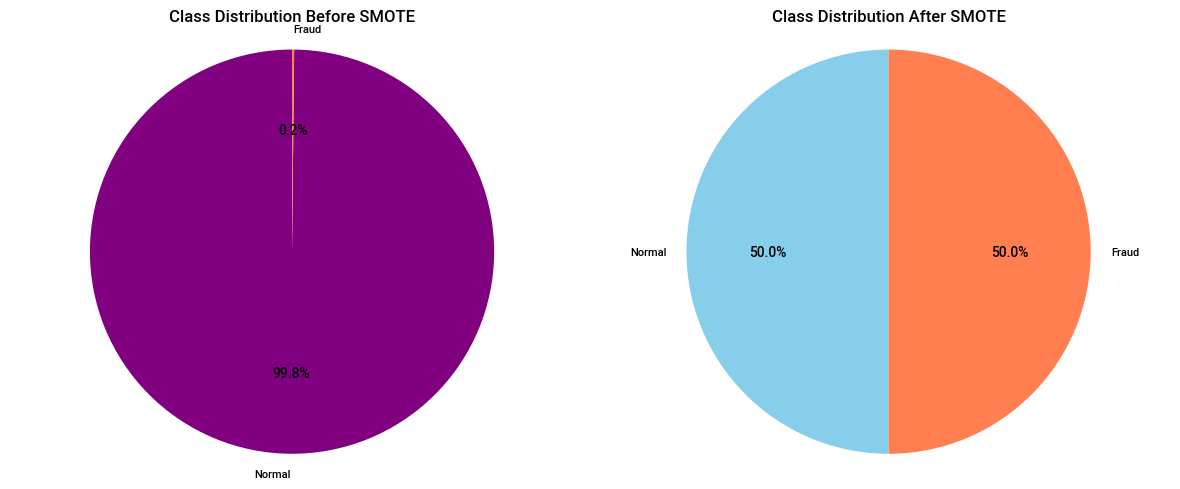

Before SMOTE - Normal: 226597 | Fraud: 383
After SMOTE  - Normal: 226597  | Fraud: 226597


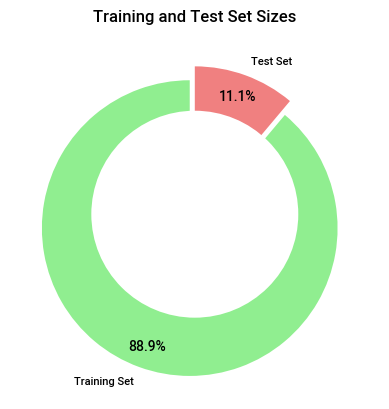

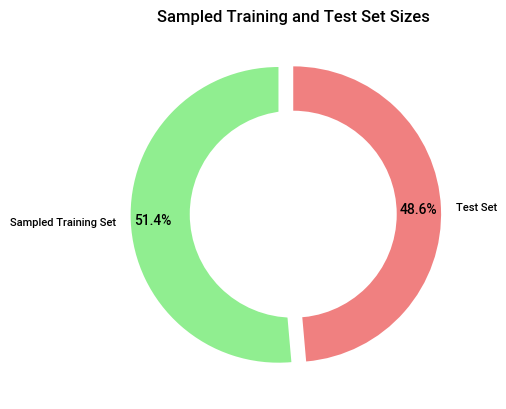

In [ ]:
# 1. Data Distribution Before and After SMOTE

# Before SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
labels = ['Normal', 'Fraud']
sizes_before = [y_train.value_counts()[0], y_train.value_counts()[1]]
sizes_after = [y_train_resampled.value_counts()[0], y_train_resampled.value_counts()[1]]

ax[0].pie(sizes_before, labels=labels, autopct='%1.1f%%', startangle=90, colors=['purple', 'coral'])
ax[0].set_title('Class Distribution Before SMOTE')
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# After SMOTE
ax[1].pie(sizes_after, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'coral'])
ax[1].set_title('Class Distribution After SMOTE')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

# Display Metrics
print(f"Before SMOTE - Normal: {sizes_before[0]} | Fraud: {sizes_before[1]}")
print(f"After SMOTE  - Normal: {sizes_after[0]}  | Fraud: {sizes_after[1]}")

# 2 Train-Test Split

labels = ['Training Set', 'Test Set']
sizes = [len(X_train_resampled), len(X_test)]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the first slice (i.e., 'Training Set')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85, explode=explode)
ax1.add_artist(plt.Circle((0,0),0.70,fc='white'))  # Draw a circle at the center of pie to make it look like a donut
ax1.set_title('Training and Test Set Sizes')
plt.show()

labels = ['Sampled Training Set', 'Test Set']
sizes = [len(X_train_sampled), len(X_test)]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the first slice (i.e., 'Training Set')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85, explode=explode)
ax1.add_artist(plt.Circle((0,0),0.70,fc='white'))  # Draw a circle at the center of pie to make it look like a donut
ax1.set_title('Sampled Training and Test Set Sizes')
plt.show()

### Making a function to plot all performance metrics for each models and algorithms

In [ ]:
def plot_confusion_matrix_and_roc(y_true, y_pred, title):
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Confusion Matrix
    print("Confusion Matrix:")
    print(cm)
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {title}')

    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the normalized confusion matrix
    plt.subplot(1, 3, 2)
    sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Greens', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Normalized Confusion Matrix - {title}')

    # Plot ROC curve
    plt.subplot(1, 3, 3)
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()


# **BUILDING AND USING THE ESEMBLE MODELS**

## **Model 1: Bagging and Boosting using Decision Tree and Feature Selection**

### **Bagging with Decision Tree**


Performance Metrics for Bagging:

Accuracy: 0.9942198569062136
Precision: 0.19010416666666666
Recall: 0.8111111111111111
F1 Score: 0.30801687763713076
ROC AUC Score: 0.902810921271455
Confusion Matrix:
[[56345   311]
 [   17    73]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56656
           1       0.19      0.81      0.31        90

    accuracy                           0.99     56746
   macro avg       0.59      0.90      0.65     56746
weighted avg       1.00      0.99      1.00     56746



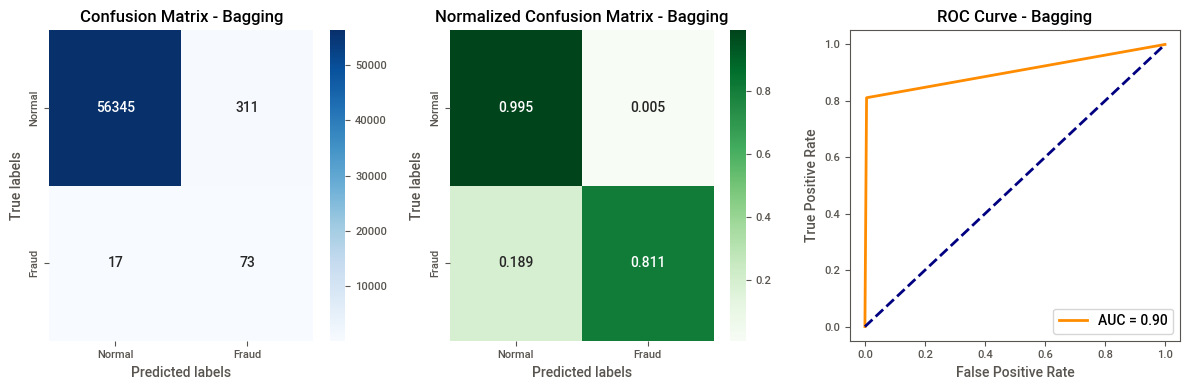

In [ ]:
# Defining the base classifier (Decision Tree)
base_classifier = DecisionTreeClassifier(random_state=42)

# Bagging Classifier
bagging_params = {
    'n_estimators': 50, #selected number of trees for the model
    'random_state': 42
}
bagging_classifier = BaggingClassifier(base_classifier, **bagging_params)
bagging_classifier.fit(X_train_sampled, y_train_sampled)

# Feature selection based on importance using a single decision tree
sfm_bagging = SelectFromModel(base_classifier, threshold=0.01)
sfm_bagging.fit(X_train_sampled, y_train_sampled)
X_train_sampled_selected_bagging = sfm_bagging.transform(X_train_sampled)
X_test_selected_bagging = sfm_bagging.transform(X_test)

# Training the Bagging classifier with selected features on resampled data
bagging_classifier.fit(X_train_sampled_selected_bagging, y_train_sampled)

# Making predictions on the test set for Bagging
y_pred_sampled_bagging = bagging_classifier.predict(X_test_selected_bagging)

# Evaluating performance metrics for Bagging
conf_matrix_sampled_bagging = confusion_matrix(y_test, y_pred_sampled_bagging)
accuracy_sampled_bagging = accuracy_score(y_test, y_pred_sampled_bagging)
precision_sampled_bagging = precision_score(y_test, y_pred_sampled_bagging)
recall_sampled_bagging = recall_score(y_test, y_pred_sampled_bagging)
f1_sampled_bagging = f1_score(y_test, y_pred_sampled_bagging)
roc_auc_sampled_bagging = roc_auc_score(y_test, y_pred_sampled_bagging)

# Printing the performance metrics for Bagging
print("\nPerformance Metrics for Bagging:")
#print("Confusion Matrix:")
#print(conf_matrix_sampled_bagging)
print("\nAccuracy:", accuracy_sampled_bagging)
print("Precision:", precision_sampled_bagging)
print("Recall:", recall_sampled_bagging)
print("F1 Score:", f1_sampled_bagging)
print("ROC AUC Score:", roc_auc_sampled_bagging)

# Applying the FUNCTION to plot performance metrics for Bagging
plot_confusion_matrix_and_roc(y_test, y_pred_sampled_bagging, 'Bagging')

### **Boosting with Decision Tree and Feature Sampling using Adaboost, XGBoost, and Gradient Boosting**


Performance Metrics for AdaBoost:

Accuracy: 0.9892327212490748
Precision: 0.10827067669172932
Recall: 0.8
F1 Score: 0.19072847682119207
ROC AUC Score: 0.8947666619598983
Confusion Matrix:
[[56063   593]
 [   18    72]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56656
           1       0.11      0.80      0.19        90

    accuracy                           0.99     56746
   macro avg       0.55      0.89      0.59     56746
weighted avg       1.00      0.99      0.99     56746



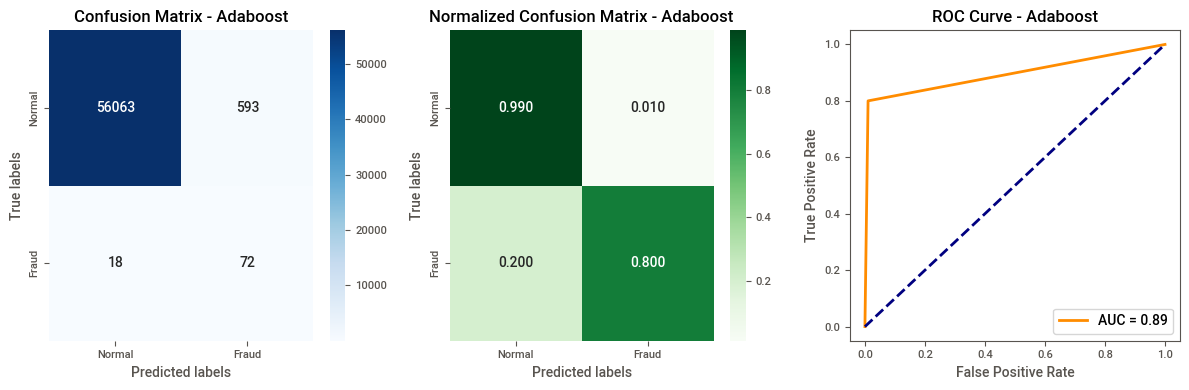


Performance Metrics for Gradient Boosting:

Accuracy: 0.9849681034786593
Precision: 0.08577633007600434
Recall: 0.8777777777777778
F1 Score: 0.1562809099901088
ROC AUC Score: 0.931458078383382
Confusion Matrix:
[[55814   842]
 [   11    79]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56656
           1       0.09      0.88      0.16        90

    accuracy                           0.98     56746
   macro avg       0.54      0.93      0.57     56746
weighted avg       1.00      0.98      0.99     56746



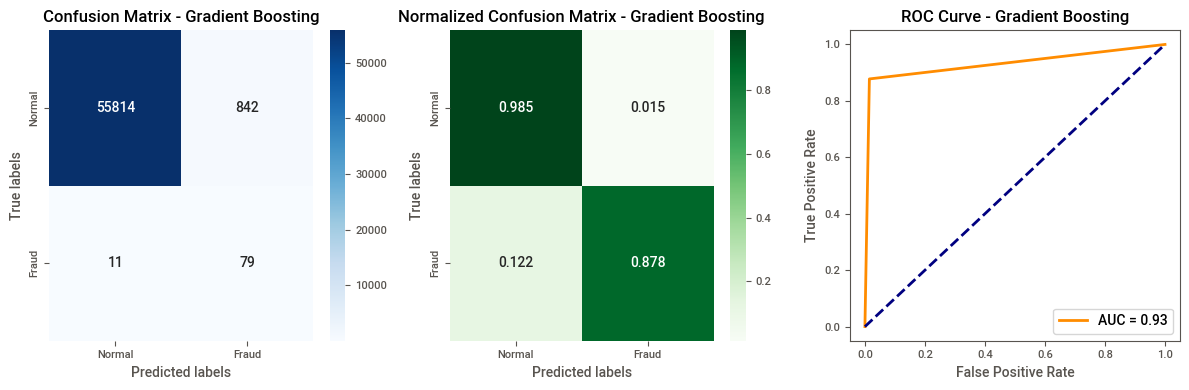


Performance Metrics for XGBoost:

Accuracy: 0.9931977584323124
Precision: 0.1711111111111111
Recall: 0.8555555555555555
F1 Score: 0.2851851851851852
ROC AUC Score: 0.924485981674982
Confusion Matrix:
[[56283   373]
 [   13    77]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56656
           1       0.17      0.86      0.29        90

    accuracy                           0.99     56746
   macro avg       0.59      0.92      0.64     56746
weighted avg       1.00      0.99      1.00     56746



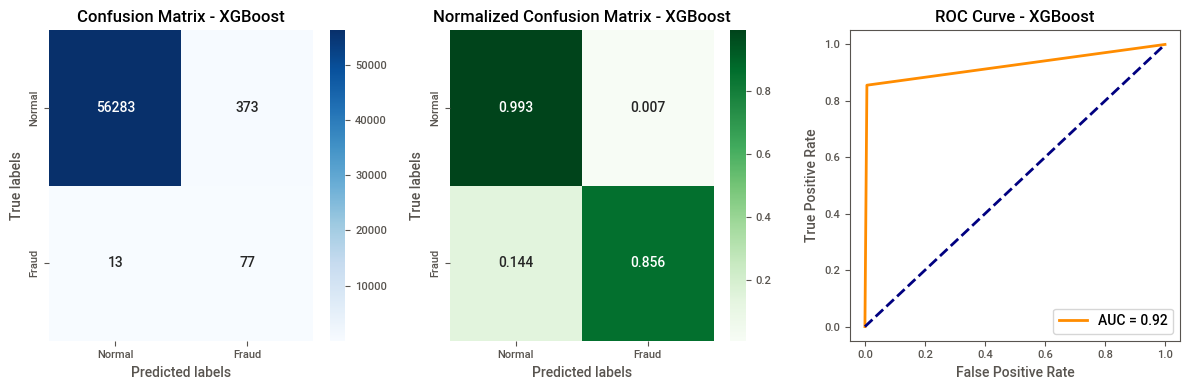

In [ ]:
# AdaBoost Classifier
adaboost_params = {
    'n_estimators': 50,
    'random_state': 42
}
adaboost_classifier = AdaBoostClassifier(base_classifier, **adaboost_params)
adaboost_classifier.fit(X_train_sampled, y_train_sampled)

# Feature selection based on importance using a single decision tree
sfm_adaboost = SelectFromModel(base_classifier, threshold=0.01)
sfm_adaboost.fit(X_train_sampled, y_train_sampled)
X_train_sampled_selected_adaboost = sfm_adaboost.transform(X_train_sampled)
X_test_selected_adaboost = sfm_adaboost.transform(X_test)

# Training the AdaBoost classifier with selected features on resampled data
adaboost_classifier.fit(X_train_sampled_selected_adaboost, y_train_sampled)

# Making predictions on the test set for AdaBoost
y_pred_sampled_adaboost = adaboost_classifier.predict(X_test_selected_adaboost)

# Evaluating performance metrics for AdaBoost
conf_matrix_sampled_adaboost = confusion_matrix(y_test, y_pred_sampled_adaboost)
accuracy_sampled_adaboost = accuracy_score(y_test, y_pred_sampled_adaboost)
precision_sampled_adaboost = precision_score(y_test, y_pred_sampled_adaboost)
recall_sampled_adaboost = recall_score(y_test, y_pred_sampled_adaboost)
f1_sampled_adaboost = f1_score(y_test, y_pred_sampled_adaboost)
roc_auc_sampled_adaboost = roc_auc_score(y_test, y_pred_sampled_adaboost)

# Printing the performance metrics for AdaBoost
print("\nPerformance Metrics for AdaBoost:")
#print("Confusion Matrix:")
#print(conf_matrix_sampled_adaboost)
print("\nAccuracy:", accuracy_sampled_adaboost)
print("Precision:", precision_sampled_adaboost)
print("Recall:", recall_sampled_adaboost)
print("F1 Score:", f1_sampled_adaboost)
print("ROC AUC Score:", roc_auc_sampled_adaboost)

# Ploting of Confusion Matrix usage for Adaboost
plot_confusion_matrix_and_roc(y_test, y_pred_sampled_adaboost, 'Adaboost')

# Gradient Boosting Classifier
gradboost_params = {
    'n_estimators': 50,
    'random_state': 42
}
gradboost_classifier = GradientBoostingClassifier(**gradboost_params)
gradboost_classifier.fit(X_train_sampled, y_train_sampled)

# Feature selection based on importance using a single decision tree
sfm_gradboost = SelectFromModel(base_classifier, threshold=0.01)
sfm_gradboost.fit(X_train_sampled, y_train_sampled)
X_train_sampled_selected_gradboost = sfm_gradboost.transform(X_train_sampled)
X_test_selected_gradboost = sfm_gradboost.transform(X_test)

# Training the Gradient Boosting classifier with selected features on resampled data
gradboost_classifier.fit(X_train_sampled_selected_gradboost, y_train_sampled)

# Making predictions on the test set for Gradient Boosting
y_pred_sampled_gradboost = gradboost_classifier.predict(X_test_selected_gradboost)

# Evaluating performance metrics for Gradient Boosting
conf_matrix_sampled_gradboost = confusion_matrix(y_test, y_pred_sampled_gradboost)
accuracy_sampled_gradboost = accuracy_score(y_test, y_pred_sampled_gradboost)
precision_sampled_gradboost = precision_score(y_test, y_pred_sampled_gradboost)
recall_sampled_gradboost = recall_score(y_test, y_pred_sampled_gradboost)
f1_sampled_gradboost = f1_score(y_test, y_pred_sampled_gradboost)
roc_auc_sampled_gradboost = roc_auc_score(y_test, y_pred_sampled_gradboost)

# Printing the performance metrics for Gradient Boosting
print("\nPerformance Metrics for Gradient Boosting:")
#print("Confusion Matrix:")
#print(conf_matrix_sampled_gradboost)
print("\nAccuracy:", accuracy_sampled_gradboost)
print("Precision:", precision_sampled_gradboost)
print("Recall:", recall_sampled_gradboost)
print("F1 Score:", f1_sampled_gradboost)
print("ROC AUC Score:", roc_auc_sampled_gradboost)

# Plotting of Confusion Matrix usage for Gradient Boosting
plot_confusion_matrix_and_roc(y_test, y_pred_sampled_gradboost, 'Gradient Boosting')

# XGBoost Classifier
xgboost_params = {
    'n_estimators': 50,
    'random_state': 42
}
xgboost_classifier = XGBClassifier(**xgboost_params)
xgboost_classifier.fit(X_train_sampled, y_train_sampled)

# Feature selection based on importance using a single decision tree
sfm_xgboost = SelectFromModel(base_classifier, threshold=0.01)
sfm_xgboost.fit(X_train_sampled, y_train_sampled)
X_train_sampled_selected_xgboost = sfm_xgboost.transform(X_train_sampled)
X_test_selected_xgboost = sfm_xgboost.transform(X_test)

# Training the XGBoost classifier with selected features on resampled data
xgboost_classifier.fit(X_train_sampled_selected_xgboost, y_train_sampled)

# Making predictions on the test set for XGBoost
y_pred_sampled_xgboost = xgboost_classifier.predict(X_test_selected_xgboost)

# Evaluating performance metrics for XGBoost
conf_matrix_sampled_xgboost = confusion_matrix(y_test, y_pred_sampled_xgboost)
accuracy_sampled_xgboost = accuracy_score(y_test, y_pred_sampled_xgboost)
precision_sampled_xgboost = precision_score(y_test, y_pred_sampled_xgboost)
recall_sampled_xgboost = recall_score(y_test, y_pred_sampled_xgboost)
f1_sampled_xgboost = f1_score(y_test, y_pred_sampled_xgboost)
roc_auc_sampled_xgboost = roc_auc_score(y_test, y_pred_sampled_xgboost)

# Printing the performance metrics for XGBoost
print("\nPerformance Metrics for XGBoost:")
#print("Confusion Matrix:")
#print(conf_matrix_sampled_xgboost)
print("\nAccuracy:", accuracy_sampled_xgboost)
print("Precision:", precision_sampled_xgboost)
print("Recall:", recall_sampled_xgboost)
print("F1 Score:", f1_sampled_xgboost)
print("ROC AUC Score:", roc_auc_sampled_xgboost)

# Ploting of Confusion Matrix usage for XGBoost
plot_confusion_matrix_and_roc(y_test, y_pred_sampled_xgboost, 'XGBoost')

### **Bagging and Boosting Combined as an Ensemble Model**


Performance Metrics for Bagging_Boosting_Model:

Accuracy: 0.997180418003031
Precision: 0.3394495412844037
Recall: 0.8222222222222222
F1 Score: 0.4805194805194805
ROC AUC Score: 0.9098402836612383
Confusion Matrix:
[[56512   144]
 [   16    74]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.34      0.82      0.48        90

    accuracy                           1.00     56746
   macro avg       0.67      0.91      0.74     56746
weighted avg       1.00      1.00      1.00     56746



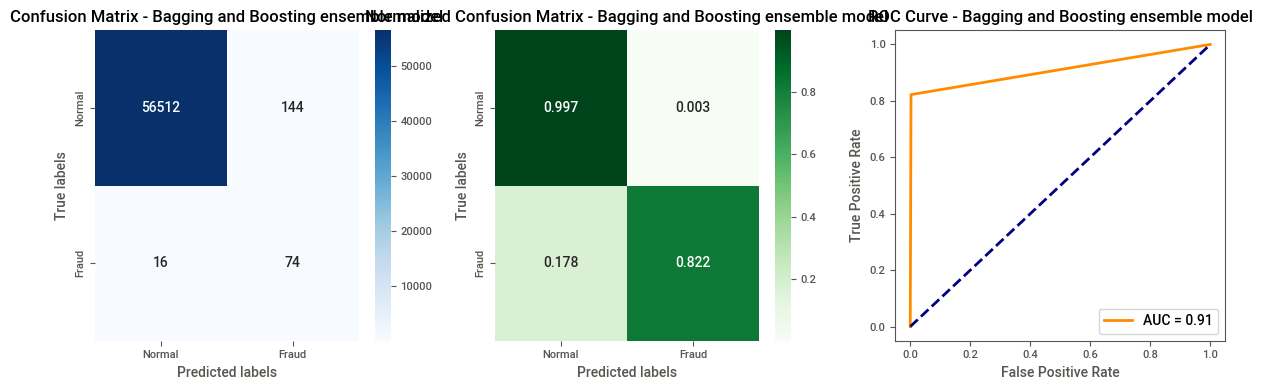

In [ ]:
# Bagging and Boosting Ensemble Model
# Creating an ensemble model using (Voting Classifier)
Bagging_and_Boosting_ensemble_model = VotingClassifier(
    estimators=[
        ('Bagging', bagging_classifier),
        ('AdaBoost', adaboost_classifier),
        ('GradientBoost', gradboost_classifier),
        ('XGBoost', xgboost_classifier)
    ],
    voting='soft'  # Using soft voting for probability-based predictions
)

# Training the ensemble model on resampled data
Bagging_and_Boosting_ensemble_model.fit(X_train_sampled, y_train_sampled)

# Making predictions on the test set
y_pred_sampled_Bagging_and_Boosting_ensemble_model = Bagging_and_Boosting_ensemble_model.predict(X_test)

# Evaluating performance metrics for the ensemble model
conf_matrix_resampled_Bagging_and_Boosting_ensemble = confusion_matrix(y_test, y_pred_sampled_Bagging_and_Boosting_ensemble_model)
accuracy_resampled_Bagging_and_Boosting_ensemble = accuracy_score(y_test, y_pred_sampled_Bagging_and_Boosting_ensemble_model)
precision_resampled_Bagging_and_Boosting_ensemble = precision_score(y_test,y_pred_sampled_Bagging_and_Boosting_ensemble_model)
recall_resampled_Bagging_and_Boosting_ensemble = recall_score(y_test, y_pred_sampled_Bagging_and_Boosting_ensemble_model)
f1_resampled_Bagging_and_Boosting_ensemble = f1_score(y_test, y_pred_sampled_Bagging_and_Boosting_ensemble_model)
roc_auc_resampled_Bagging_and_Boosting_ensemble = roc_auc_score(y_test, y_pred_sampled_Bagging_and_Boosting_ensemble_model)

# Printing the performance metrics for the Bagging and Boosting ensemble model
print("\nPerformance Metrics for Bagging_Boosting_Model:")
#print("Confusion Matrix:")
#print(conf_matrix_resampled_Bagging_and_Boosting_ensemble)
print("\nAccuracy:", accuracy_resampled_Bagging_and_Boosting_ensemble)
print("Precision:", precision_resampled_Bagging_and_Boosting_ensemble)
print("Recall:", recall_resampled_Bagging_and_Boosting_ensemble)
print("F1 Score:", f1_resampled_Bagging_and_Boosting_ensemble)
print("ROC AUC Score:", roc_auc_resampled_Bagging_and_Boosting_ensemble)

# Ploting of Confusion Matrix usage for Bagging and Boosting ensemble model
plot_confusion_matrix_and_roc(y_test, y_pred_sampled_Bagging_and_Boosting_ensemble_model, 'Bagging and Boosting ensemble model')

## **Model 2: Stacking and Blending using Randon Forest, grading boosting, and K-Nearest Neighbour, with Logistic Regression as the classifier**

In [ ]:
# Defining parameter grids for hyperparameter tuning

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing RandomizedSearchCV for random forest best parameters
rf_random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
rf_random_search.fit(X_train_sampled, y_train_sampled)
best_rf_params = rf_random_search.best_params_

In [ ]:
# Performing RandomizedSearchCV for KNN best parameters
knn_random_search = RandomizedSearchCV(KNeighborsClassifier(), knn_param_grid, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
knn_random_search.fit(X_train_sampled, y_train_sampled)
best_knn_params = knn_random_search.best_params_

In [ ]:
# Performing RandomizedSearchCV for grading boosting best parameters
gb_random_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid, n_iter=5, cv=3, scoring='roc_auc', random_state=42)
gb_random_search.fit(X_train_sampled, y_train_sampled)
best_gb_params = gb_random_search.best_params_

In [ ]:
#Printing the detected best parameters for each algorithms
print("Random Forest Best Parameters:", best_rf_params)
print("KNN Best Parameters:", best_knn_params)
print("Grading Boosting Best Parameters:", best_gb_params)

Random Forest Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
KNN Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 10}
Grading Boosting Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.1}



Performance Metrics for Tuned Stacking Classifier:

Accuracy: 0.9991717477883904
Precision: 0.7128712871287128
Recall: 0.8
F1 Score: 0.7539267015706805
ROC AUC Score: 0.8997440694719006
Confusion Matrix:
[[56627    29]
 [   18    72]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.71      0.80      0.75        90

    accuracy                           1.00     56746
   macro avg       0.86      0.90      0.88     56746
weighted avg       1.00      1.00      1.00     56746



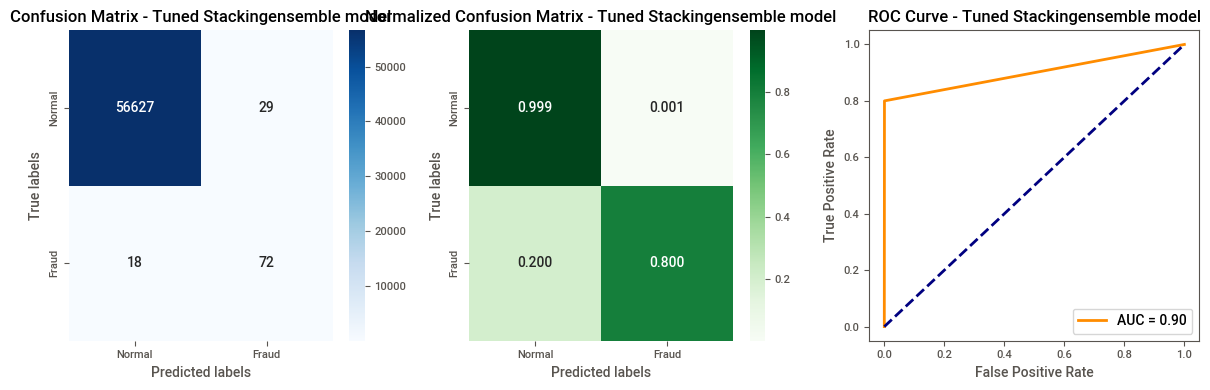

In [ ]:
# Updating base classifiers with best hyperparameters
rf_classifier = RandomForestClassifier(**best_rf_params, random_state=42)
knn_classifier = KNeighborsClassifier(**best_knn_params)
gb_classifier = GradientBoostingClassifier(**best_gb_params, random_state=42)

# Creating the stacking classifier
stacking_classifier_tuned = StackingClassifier(
    estimators=[('rf', rf_classifier),
                ('gb', gb_classifier),
                ('knn', knn_classifier)],
    final_estimator=LogisticRegression(),
    cv=5
)

# Training the stacking classifier
stacking_classifier_tuned.fit(X_train_sampled, y_train_sampled)

# Making predictions on the test set
y_pred_stacking_tuned = stacking_classifier_tuned.predict(X_test)

# Evaluating performance metrics for tuned stacking classifier
conf_matrix_stacking_tuned = confusion_matrix(y_test, y_pred_stacking_tuned)
accuracy_stacking_tuned = accuracy_score(y_test, y_pred_stacking_tuned)
precision_stacking_tuned = precision_score(y_test, y_pred_stacking_tuned)
recall_stacking_tuned = recall_score(y_test, y_pred_stacking_tuned)
f1_stacking_tuned = f1_score(y_test, y_pred_stacking_tuned)
roc_auc_stacking_tuned = roc_auc_score(y_test, y_pred_stacking_tuned)

# Printing the performance metrics for tuned stacking classifier
print("\nPerformance Metrics for Tuned Stacking Classifier:")
#print("Confusion Matrix:")
#print(conf_matrix_stacking_tuned)
print("\nAccuracy:", accuracy_stacking_tuned)
print("Precision:", precision_stacking_tuned)
print("Recall:", recall_stacking_tuned)
print("F1 Score:", f1_stacking_tuned)
print("ROC AUC Score:", roc_auc_stacking_tuned)

# Ploting of Confusion Matrix usage for tuned stacking
plot_confusion_matrix_and_roc(y_test, y_pred_stacking_tuned, 'Tuned Stackingensemble model')

### **Model 3: Risk-Based Bagging Ensemble Model using Balanced Random Forest Classifier and larger number of trees**

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(



Performance Metrics for Tuned Risk-Based Bagging Classifier:

Accuracy: 0.9991541254009093
Precision: 0.6909090909090909
Recall: 0.8444444444444444
F1 Score: 0.7599999999999999
ROC AUC Score: 0.9219221657410023
Confusion Matrix:
[[56622    34]
 [   14    76]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.69      0.84      0.76        90

    accuracy                           1.00     56746
   macro avg       0.85      0.92      0.88     56746
weighted avg       1.00      1.00      1.00     56746



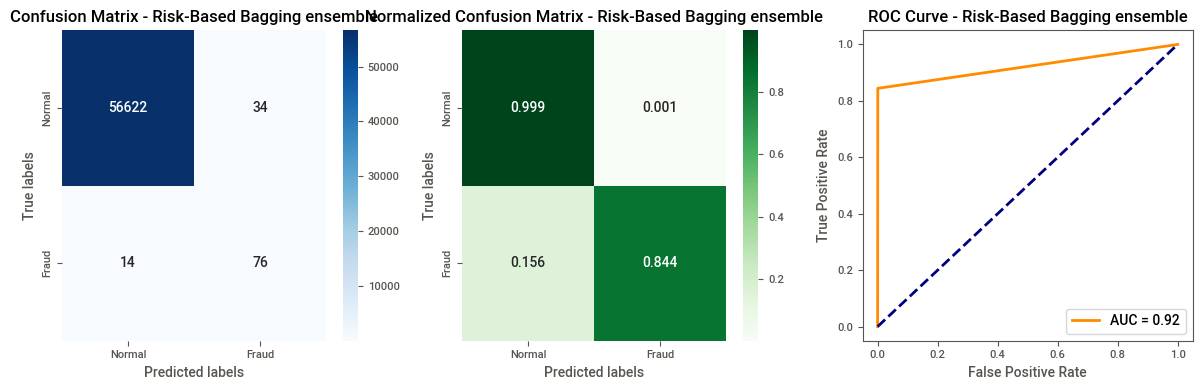

In [ ]:
# Creating the Risk-Based Bagging classifier using BalancedRandomForestClassifier
risk_based_bagging_classifier_tuned = BalancedRandomForestClassifier(
    n_estimators=200,  #200 trees was specified as estimator
    random_state=42
)

# Training the Risk-Based Bagging classifier
risk_based_bagging_classifier_tuned.fit(X_train_sampled, y_train_sampled)

# Making predictions on the test set
y_pred_risk_bagging_tuned = risk_based_bagging_classifier_tuned.predict(X_test)

# Evaluating performance metrics for tuned Risk-Based Bagging classifier
conf_matrix_risk_bagging_tuned = confusion_matrix(y_test, y_pred_risk_bagging_tuned)
accuracy_risk_bagging_tuned = accuracy_score(y_test, y_pred_risk_bagging_tuned)
precision_risk_bagging_tuned = precision_score(y_test, y_pred_risk_bagging_tuned)
recall_risk_bagging_tuned = recall_score(y_test, y_pred_risk_bagging_tuned)
f1_risk_bagging_tuned = f1_score(y_test, y_pred_risk_bagging_tuned)
roc_auc_risk_bagging_tuned = roc_auc_score(y_test, y_pred_risk_bagging_tuned)

# Printing the performance metrics for tuned Risk-Based Bagging classifier
print("\nPerformance Metrics for Tuned Risk-Based Bagging Classifier:")
#print("Confusion Matrix:")
#print(conf_matrix_risk_bagging_tuned)
print("\nAccuracy:", accuracy_risk_bagging_tuned)
print("Precision:", precision_risk_bagging_tuned)
print("Recall:", recall_risk_bagging_tuned)
print("F1 Score:", f1_risk_bagging_tuned)
print("ROC AUC Score:", roc_auc_risk_bagging_tuned)

# Ploting of Confusion Matrix usage for tuned stacking
plot_confusion_matrix_and_roc(y_test, y_pred_risk_bagging_tuned, 'Risk-Based Bagging ensemble')

### **Model 4: Combining the 3 ensemble model and voting for the best performance**

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:600: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(



Performance Metrics for Combined Ensemble Model:

Accuracy: 0.9990131463010609
Precision: 0.6517857142857143
Recall: 0.8111111111111111
F1 Score: 0.7227722772277229
ROC AUC Score: 0.905211373121215
Confusion Matrix:
[[56617    39]
 [   17    73]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.65      0.81      0.72        90

    accuracy                           1.00     56746
   macro avg       0.83      0.91      0.86     56746
weighted avg       1.00      1.00      1.00     56746



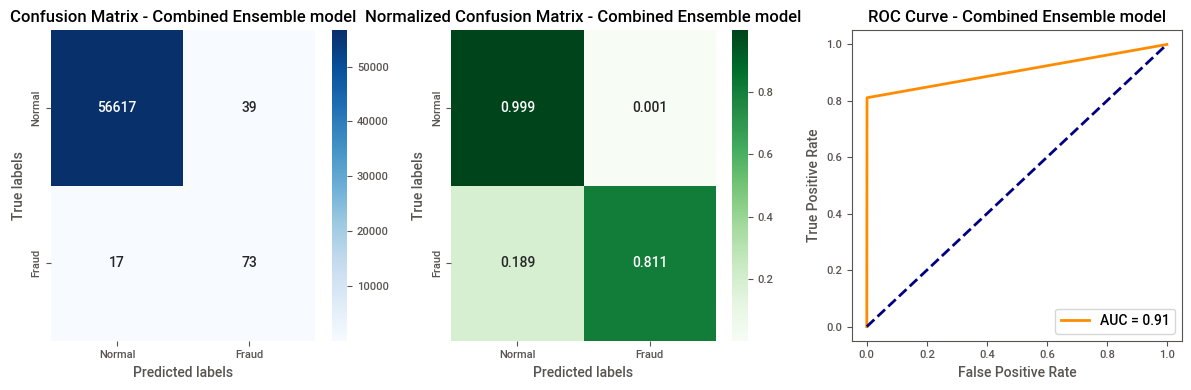

In [ ]:
# Creating the Combined Ensemble model using VotingClassifier
combined_ensemble_model = VotingClassifier(
    estimators=[
        ('bagging_boosting', Bagging_and_Boosting_ensemble_model),
        ('stacking_classifier', stacking_classifier_tuned),
        ('risk_based_bagging', risk_based_bagging_classifier_tuned)
    ],
    voting='soft'
)

# Fiting the Combined Ensemble model on the training data
combined_ensemble_model.fit(X_train_sampled, y_train_sampled)

# Make predictions on the test set
y_pred_combined_ensemble = combined_ensemble_model.predict(X_test)

# Evaluating performance metrics for the Combined Ensemble model
conf_matrix_combined_ensemble = confusion_matrix(y_test, y_pred_combined_ensemble)
accuracy_combined_ensemble = accuracy_score(y_test, y_pred_combined_ensemble)
precision_combined_ensemble = precision_score(y_test, y_pred_combined_ensemble)
recall_combined_ensemble = recall_score(y_test, y_pred_combined_ensemble)
f1_combined_ensemble = f1_score(y_test, y_pred_combined_ensemble)
roc_auc_combined_ensemble = roc_auc_score(y_test, y_pred_combined_ensemble)

# Printing the performance metrics for the Combined Ensemble model
print("\nPerformance Metrics for Combined Ensemble Model:")
#print("Confusion Matrix:")
#print(conf_matrix_combined_ensemble)
print("\nAccuracy:", accuracy_combined_ensemble)
print("Precision:", precision_combined_ensemble)
print("Recall:", recall_combined_ensemble)
print("F1 Score:", f1_combined_ensemble)
print("ROC AUC Score:", roc_auc_combined_ensemble)

# Ploting of Confusion Matrix usage for Combined Ensemble model
plot_confusion_matrix_and_roc(y_test, y_pred_combined_ensemble, 'Combined Ensemble model')

## **Generating the Feature Importance for Random Forest, Decision Tree, and Adaboost for Comparison**

Random Forest Feature Importance:
['V17' 'V14' 'V12' 'V10' 'V16' 'V11' 'V9' 'V18' 'V4' 'V7' 'V26' 'V2' 'V3'
 'V21' 'V6' 'V27' 'V1' 'V8' 'V20' 'Time' 'V5' 'V19' 'Amount' 'V15' 'V22'
 'V28' 'V13' 'V24' 'V25' 'V23']
[0.14814577 0.13482776 0.12414431 0.07762293 0.07417136 0.05212623
 0.03554766 0.02960459 0.02887131 0.02504739 0.02349966 0.02038222
 0.01995806 0.01605317 0.01409975 0.01404517 0.01403185 0.01329716
 0.01325665 0.01309288 0.01251561 0.01232634 0.01212862 0.01208303
 0.01199758 0.01109381 0.01045071 0.00945041 0.00942381 0.00670421]

Decision Tree Feature Importance:
['V17' 'V14' 'V10' 'V4' 'V26' 'V27' 'V16' 'Amount' 'V7' 'V15' 'V12' 'V21'
 'Time' 'V19' 'V1' 'V20' 'V22' 'V6' 'V28' 'V11' 'V25' 'V2' 'V24' 'V13'
 'V9' 'V23' 'V5' 'V8' 'V18' 'V3']
[5.07323002e-01 1.12942603e-01 9.20855919e-02 3.38801580e-02
 3.15329173e-02 2.99967041e-02 2.17606736e-02 1.99635275e-02
 1.74548720e-02 1.56868411e-02 1.20271905e-02 1.17756354e-02
 1.14583982e-02 1.09292789e-02 1.00096403e-02 9.167260

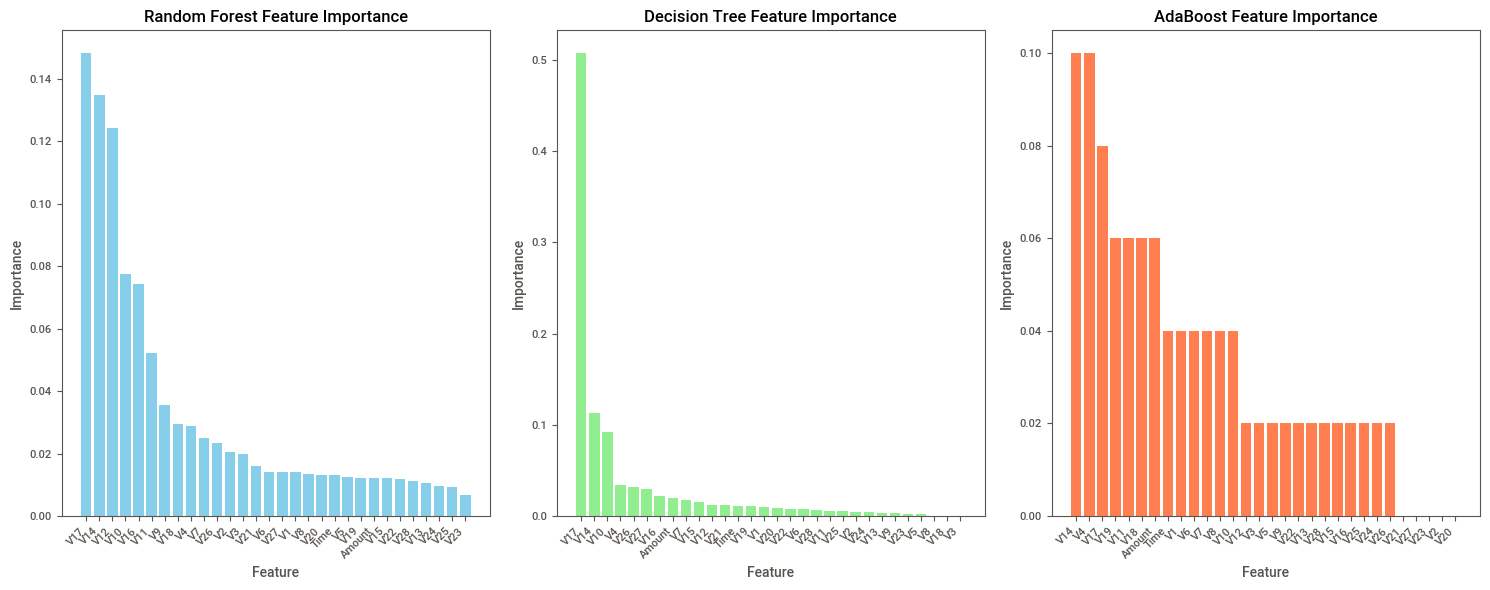

In [ ]:
feature_names = X.columns.tolist()

# Defining individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Training individual classifiers
rf_classifier.fit(X_train, y_train)
dt_classifier.fit(X_train, y_train)
adaboost_classifier.fit(X_train, y_train)

# Getting feature importances from each classifier
rf_feature_importance = rf_classifier.feature_importances_
dt_feature_importance = dt_classifier.feature_importances_
adaboost_feature_importance = adaboost_classifier.feature_importances_

# Sorting feature names and importance for each classifier
rf_sorted_indices = np.argsort(rf_feature_importance)[::-1]
rf_sorted_feature_names = np.array(feature_names)[rf_sorted_indices]
rf_sorted_importance = rf_feature_importance[rf_sorted_indices]

dt_sorted_indices = np.argsort(dt_feature_importance)[::-1]
dt_sorted_feature_names = np.array(feature_names)[dt_sorted_indices]
dt_sorted_importance = dt_feature_importance[dt_sorted_indices]

adaboost_sorted_indices = np.argsort(adaboost_feature_importance)[::-1]
adaboost_sorted_feature_names = np.array(feature_names)[adaboost_sorted_indices]
adaboost_sorted_importance = adaboost_feature_importance[adaboost_sorted_indices]

# Displaying feature importance for each classifier
print("Random Forest Feature Importance:")
print(rf_sorted_feature_names)
print(rf_sorted_importance)

print("\nDecision Tree Feature Importance:")
print(dt_sorted_feature_names)
print(dt_sorted_importance)

print("\nAdaBoost Feature Importance:")
print(adaboost_sorted_feature_names)
print(adaboost_sorted_importance)

#Ploting feature importance for each classifier
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.bar(rf_sorted_feature_names, rf_sorted_importance, color='skyblue')
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
plt.bar(dt_sorted_feature_names, dt_sorted_importance, color='lightgreen')
plt.title('Decision Tree Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
plt.bar(adaboost_sorted_feature_names, adaboost_sorted_importance, color='coral')
plt.title('AdaBoost Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## **Extracting Feature Importance of the best perfoming ensemble model (Risk-Based Bagging Classifier)**

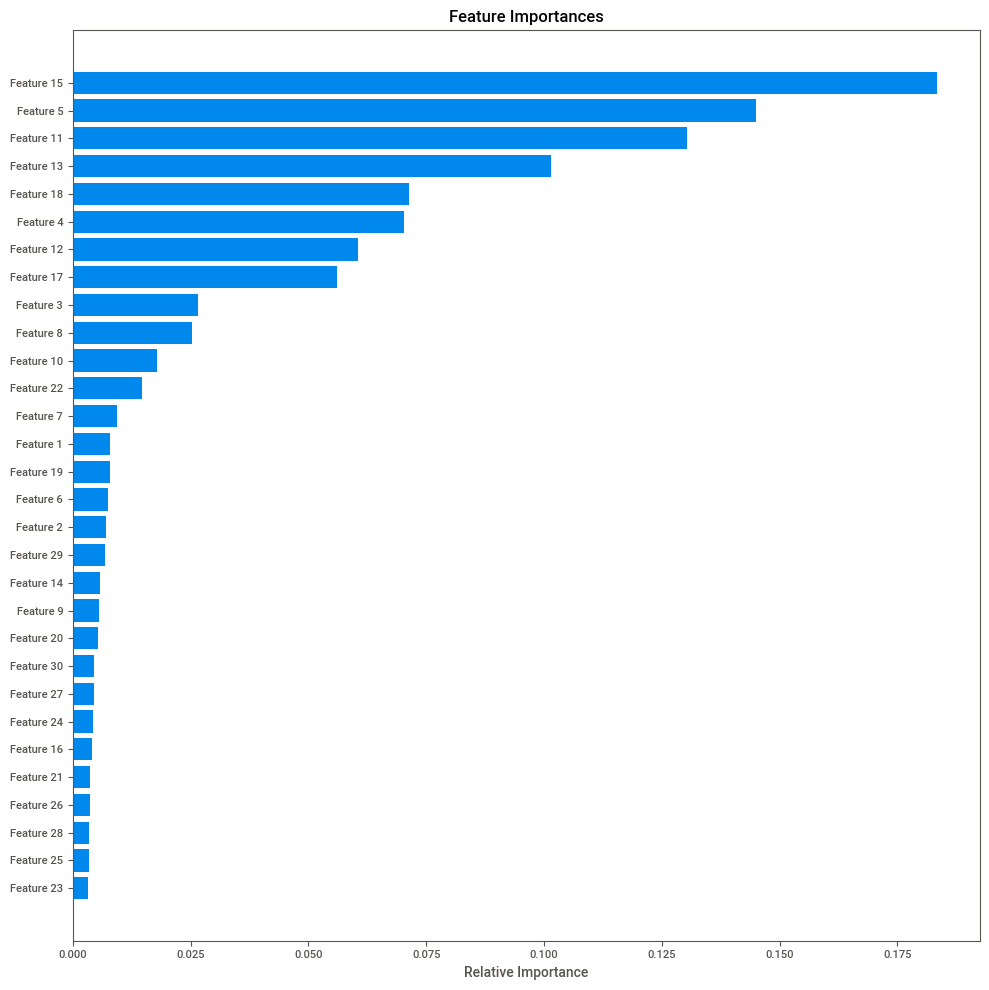

Feature 15: 0.1834
Feature 5: 0.1449
Feature 11: 0.1304
Feature 13: 0.1014
Feature 18: 0.0713
Feature 4: 0.0702
Feature 12: 0.0604
Feature 17: 0.0561
Feature 3: 0.0265
Feature 8: 0.0252
Feature 10: 0.0179
Feature 22: 0.0148
Feature 7: 0.0093
Feature 1: 0.0080
Feature 19: 0.0079
Feature 6: 0.0074
Feature 2: 0.0070
Feature 29: 0.0069
Feature 14: 0.0057
Feature 9: 0.0055
Feature 20: 0.0053
Feature 30: 0.0045
Feature 27: 0.0044
Feature 24: 0.0043
Feature 16: 0.0041
Feature 21: 0.0036
Feature 26: 0.0036
Feature 28: 0.0034
Feature 25: 0.0034
Feature 23: 0.0033


In [ ]:

# Extracting feature importances from the trained model
feature_importances = risk_based_bagging_classifier_tuned.feature_importances_

# Sorting the features based on importance
sorted_idx = np.argsort(feature_importances)

# Generating placeholder feature names
feature_names = [f"Feature {i+1}" for i in range(X_train_resampled.shape[1])]

# Ploting the feature importances
plt.figure(figsize=(10, len(sorted_idx)//3))
plt.title("Feature Importances")
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

# Sorted feature importances in descending order:
sorted_features = [(feature_names[i], feature_importances[i]) for i in sorted_idx[::-1]]
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

# **Comparing the Ensemble Model Performances**

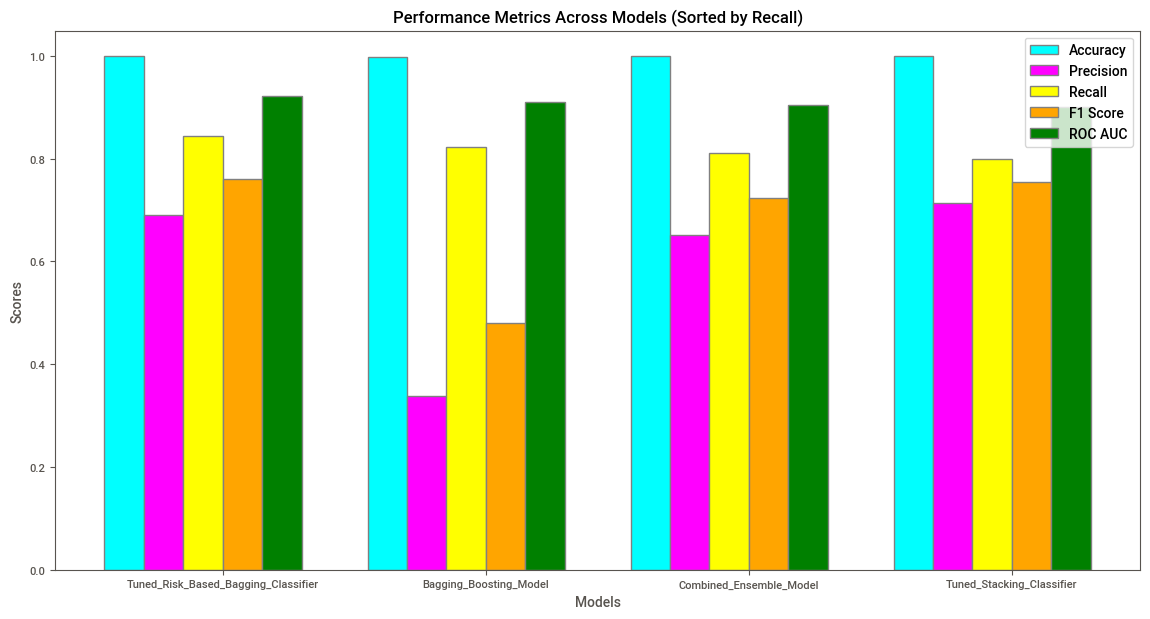

In [ ]:
# Model names
models = ['Bagging_Boosting_Model', 'Tuned_Stacking_Classifier', 'Tuned_Risk_Based_Bagging_Classifier', 'Combined_Ensemble_Model']

# Performance metrics for each model
accuracy = [0.997, 0.999, 0.999, 0.999]
precision = [0.339, 0.713, 0.691, 0.652]
recall = [0.822, 0.8, 0.844, 0.811]
f1_score = [0.481, 0.754, 0.76, 0.723]
roc_auc = [0.91, 0.9, 0.922, 0.905]

# Sorting models based on recall in descending order
sorted_indices = np.argsort(recall)[::-1]
models = np.array(models)[sorted_indices]
accuracy = np.array(accuracy)[sorted_indices]
precision = np.array(precision)[sorted_indices]
recall = np.array(recall)[sorted_indices]
f1_score = np.array(f1_score)[sorted_indices]
roc_auc = np.array(roc_auc)[sorted_indices]

barWidth = 0.15
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.figure(figsize=(14, 7))

# Creating bars
plt.bar(r1, accuracy, width=barWidth, color='cyan', edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, width=barWidth, color='magenta', edgecolor='grey', label='Precision')
plt.bar(r3, recall, width=barWidth, color='yellow', edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, width=barWidth, color='orange', edgecolor='grey', label='F1 Score')
plt.bar(r5, roc_auc, width=barWidth, color='green', edgecolor='grey', label='ROC AUC')

# Title & Subtitle
plt.title('Performance Metrics Across Models (Sorted by Recall)')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + 2.5 * barWidth for r in range(len(models))], models)

# Creating legend & Show graphic
plt.legend()
plt.show()
